The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [117]:
df =pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [119]:
df.head(40)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [120]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [121]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [122]:
df.shape

(907, 27)

In [124]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [126]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace =True)

In [127]:
df.shape

(907, 23)

In [128]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


visualization

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'generation_gwh_2019'}>]],
      dtype=object)

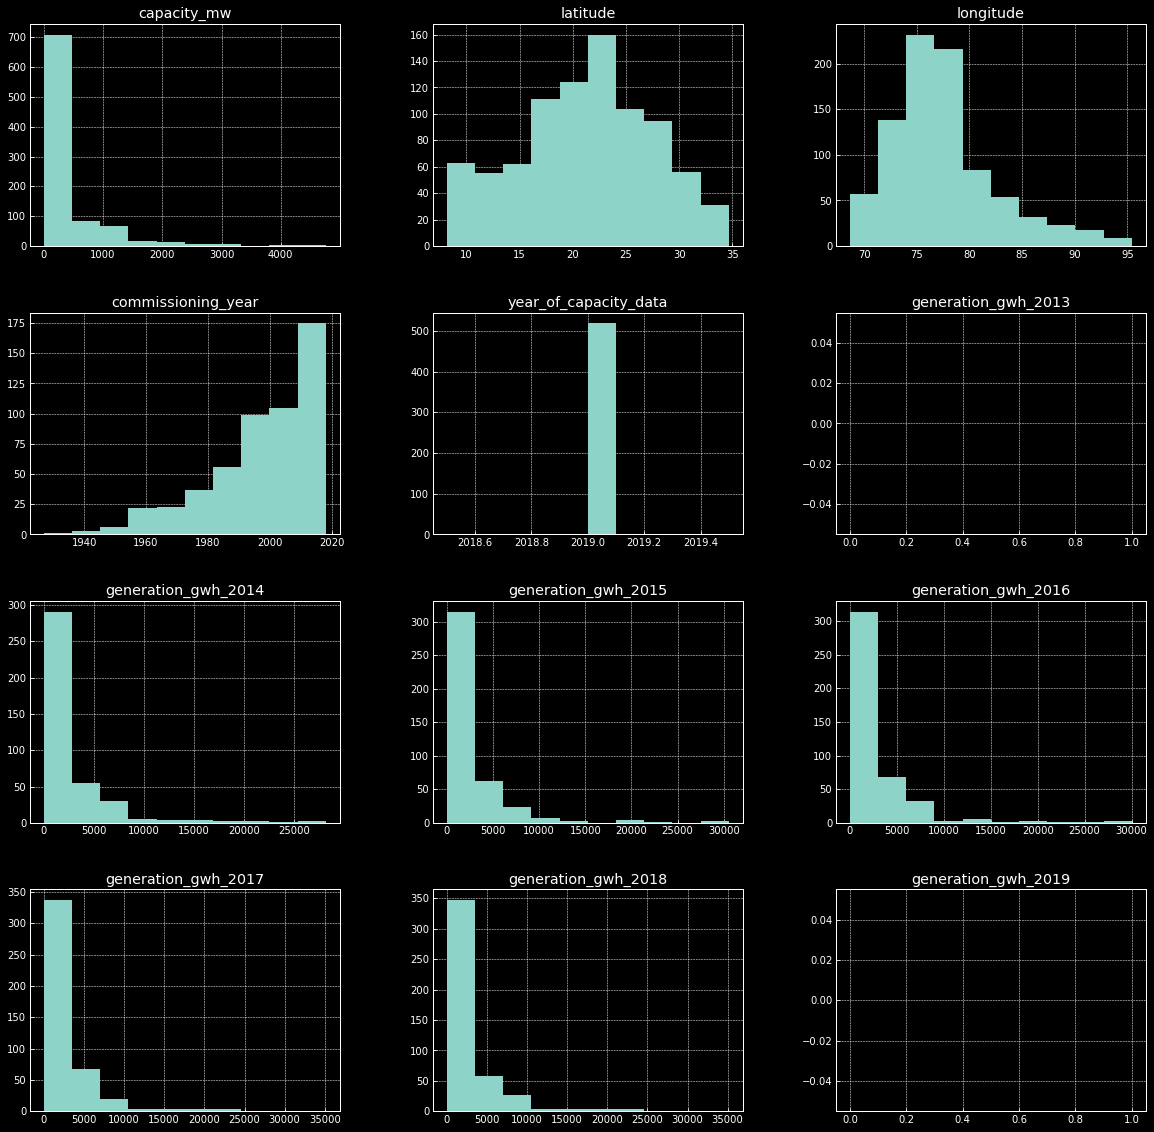

In [129]:
df.hist(figsize = (20,20))

In [130]:
column = ['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','owner','source','url','geolocation_source','generation_data_source']
for i in column:
    print(i," :")
    print(df[i].value_counts())
    print("\n")

country  :
IND    907
Name: country, dtype: int64


country_long  :
India    907
Name: country_long, dtype: int64


name  :
Chingerbandh Solar Power Plant                                     1
BAIRA SIUL                                                         1
PAGUTHAN                                                           1
RADHANAGRI                                                         1
POCHAMPAD                                                          1
KAYAM KULAM GT                                                     1
PAINAMPURAM                                                        1
Dadri Solar Power Plant                                            1
KARAD MILL                                                         1
TROMBAY_Coal                                                       1
WADI CEMENT PLANT                                                  1
SWPPL Madhavakurichi                                               1
MANGALORE REFINERY                              

analysis

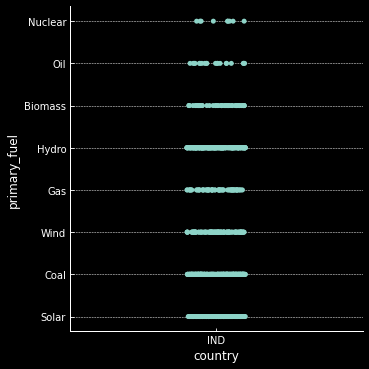

In [131]:
sns.catplot(x='country',y='primary_fuel',data=df)

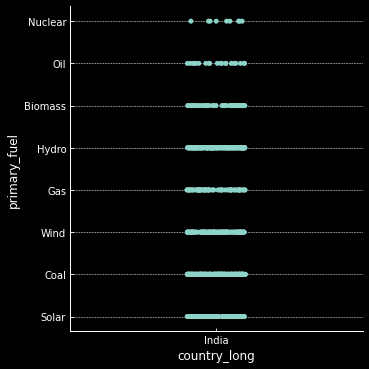

In [132]:
sns.catplot(x='country_long',y='primary_fuel',data=df)

<Figure size 1080x720 with 0 Axes>

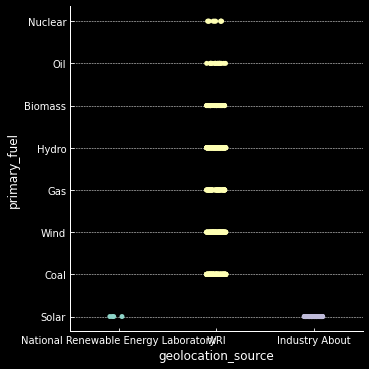

In [133]:
plt.figure(figsize=(15,10))
sns.catplot(x='geolocation_source',y='primary_fuel',data=df)
plt.show()

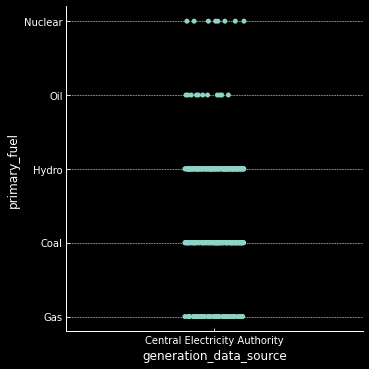

In [134]:
sns.catplot(x=df['generation_data_source'],y=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

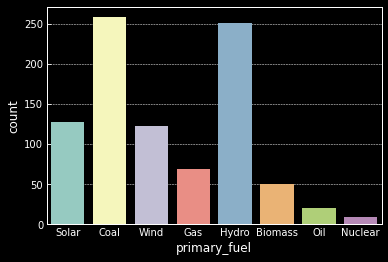

In [135]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

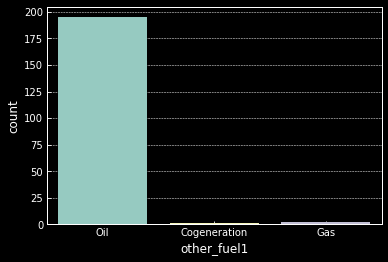

In [136]:
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

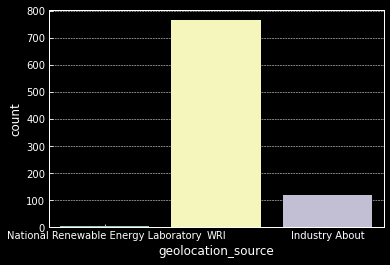

In [137]:
sns.countplot(df['geolocation_source'])

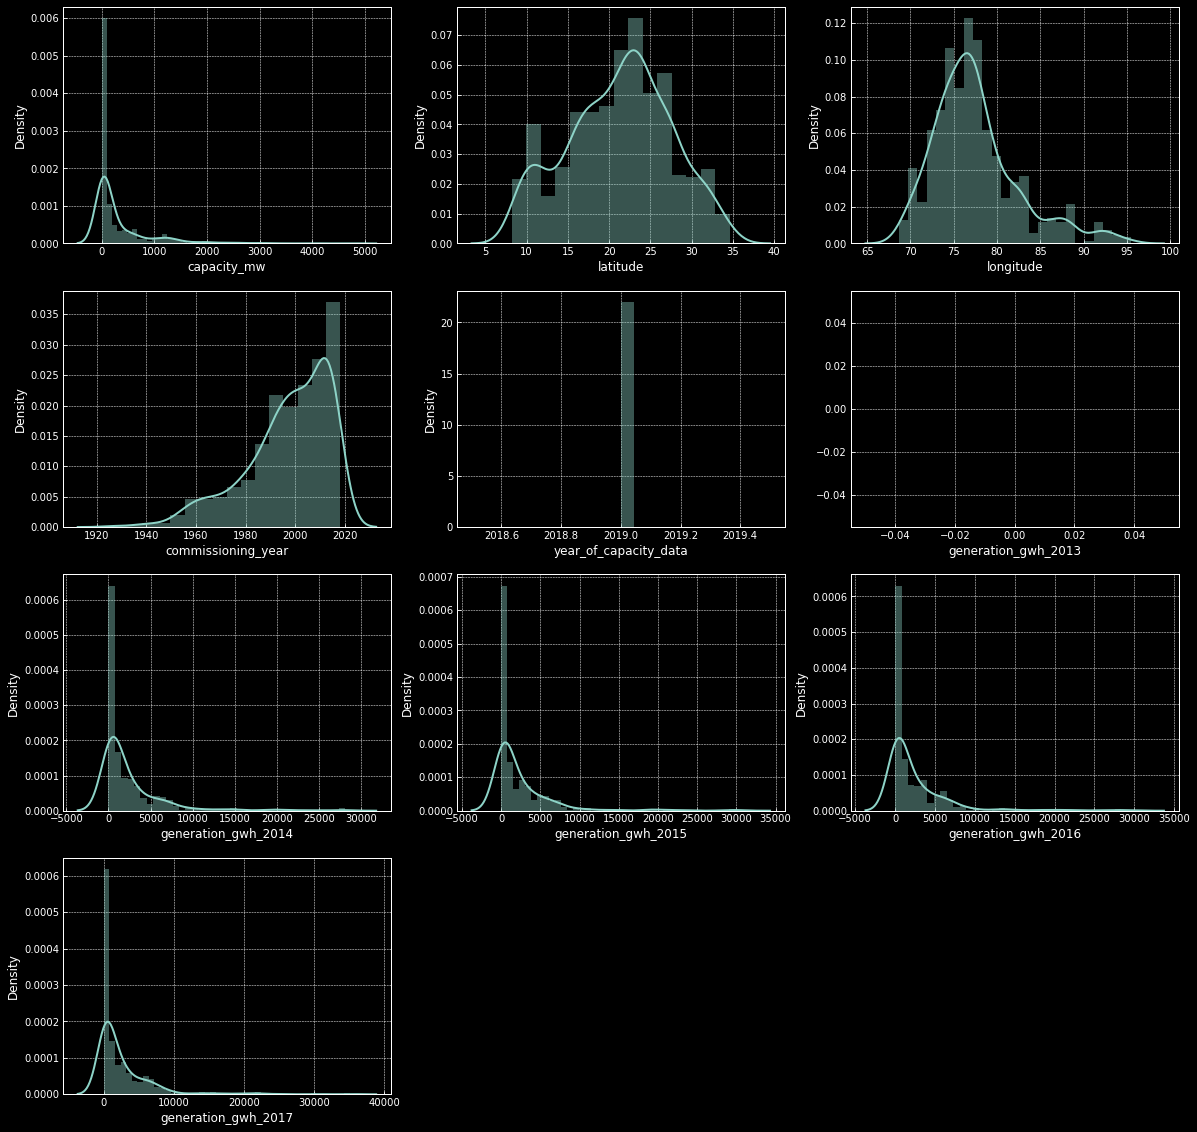

In [138]:
column=['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
plt.figure(figsize=(20,20))
graph =1
for i in column:
    if graph <=10:
        ax=plt.subplot(4,3,graph)
        sns.distplot(df[i])
        plt.xlabel(i)
        graph +=1
        
plt.show()    

Bi-variate Analysis

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

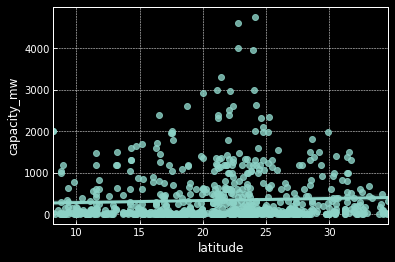

In [139]:
sns.regplot(df['latitude'],df['capacity_mw'])

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

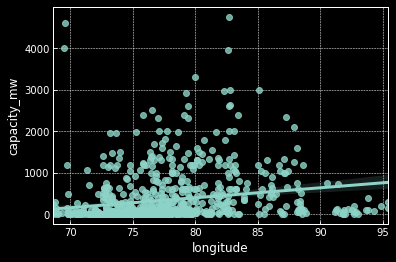

In [140]:
sns.regplot(df['longitude'],df["capacity_mw"])

<AxesSubplot:ylabel='capacity_mw'>

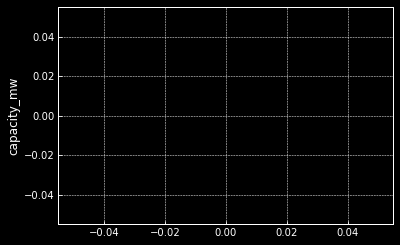

In [141]:
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw", data = df,color="g")

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

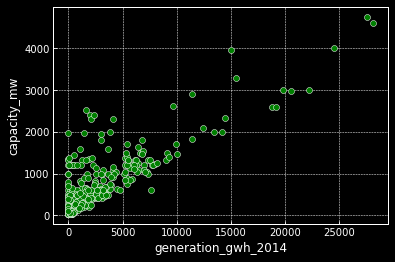

In [142]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="g")

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

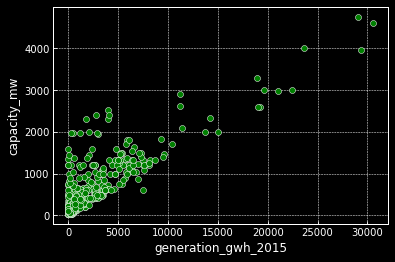

In [143]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df,color="g")

Good Linear relationship between generation_gwh_2015 and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

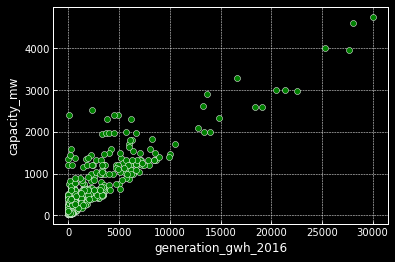

In [144]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df,color="g")

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

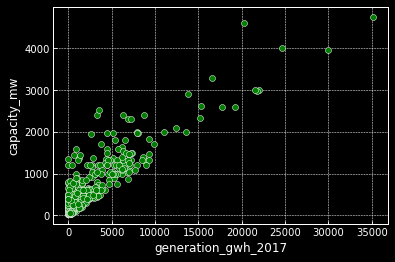

In [145]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = df,color="g")

Multivariate Analysis

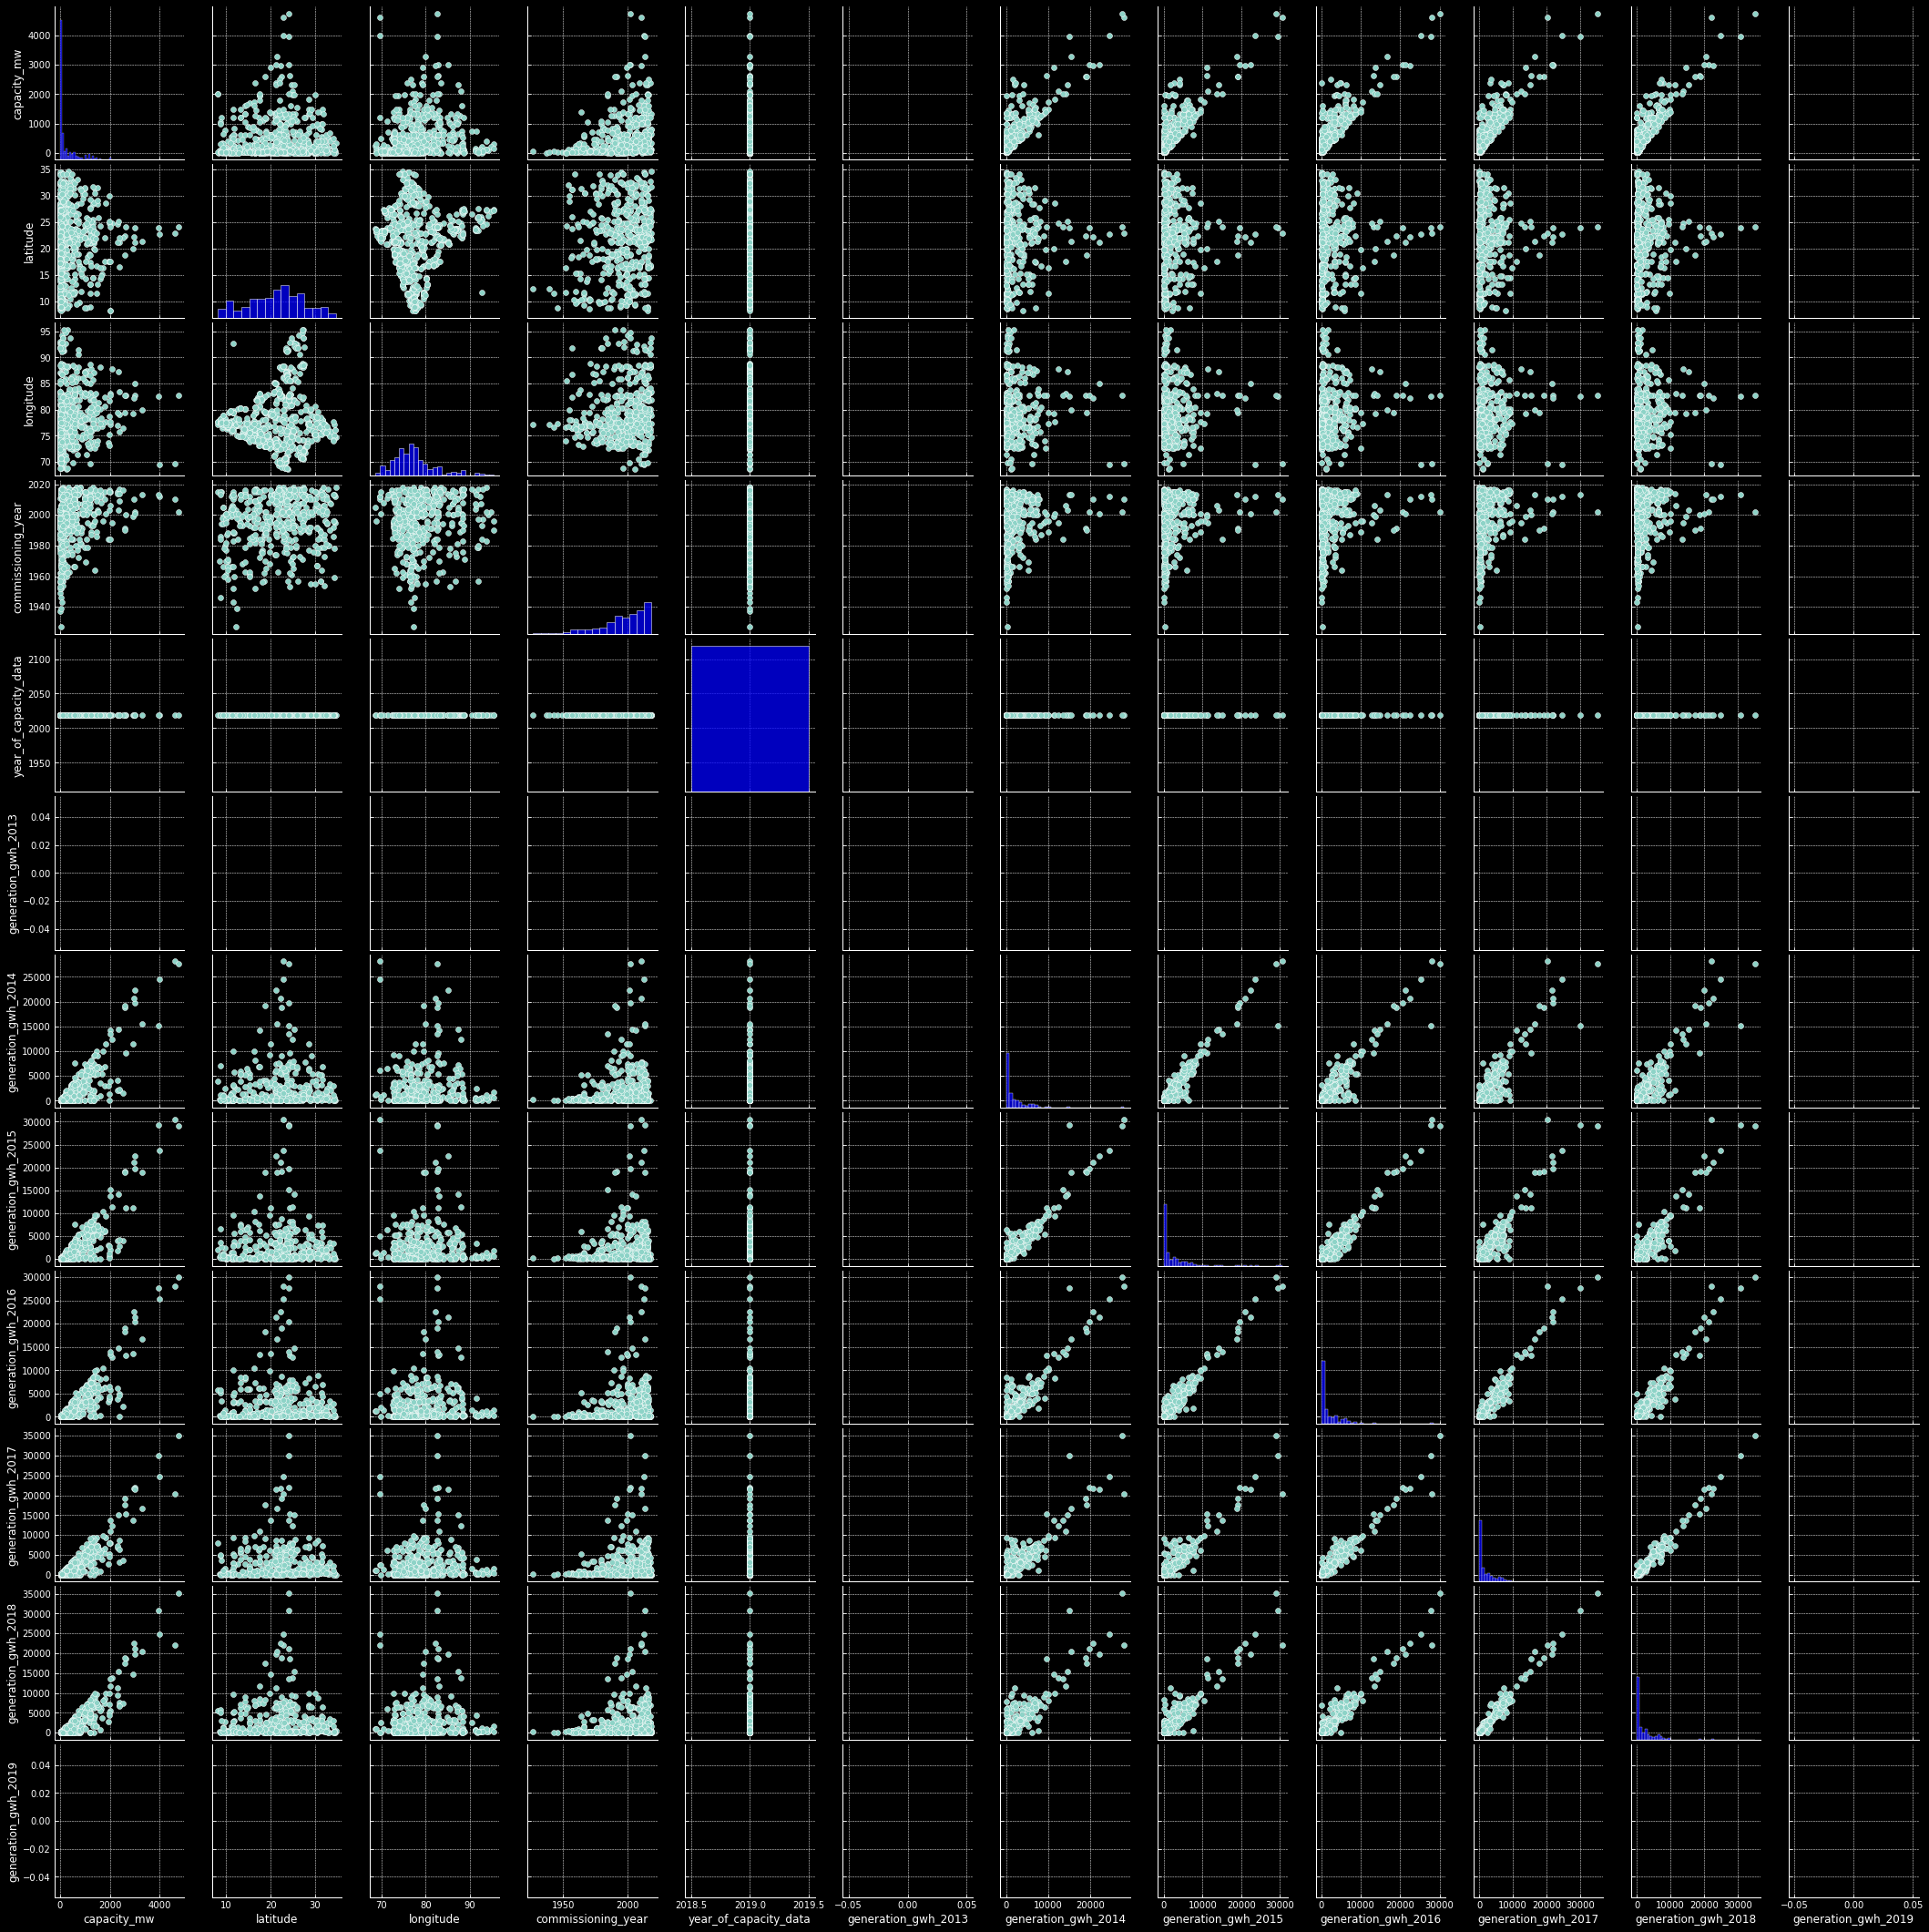

In [146]:
sns.pairplot(df)

data preprocessing

In [147]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [148]:
df.drop('other_fuel1',axis=1,inplace =True)

In [149]:
df.shape

(907, 22)

In [150]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source     object
dtype: object

In [151]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [152]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013       907
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [153]:
## Filling null values in categorical column:
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

In [154]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       907
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

coorelation

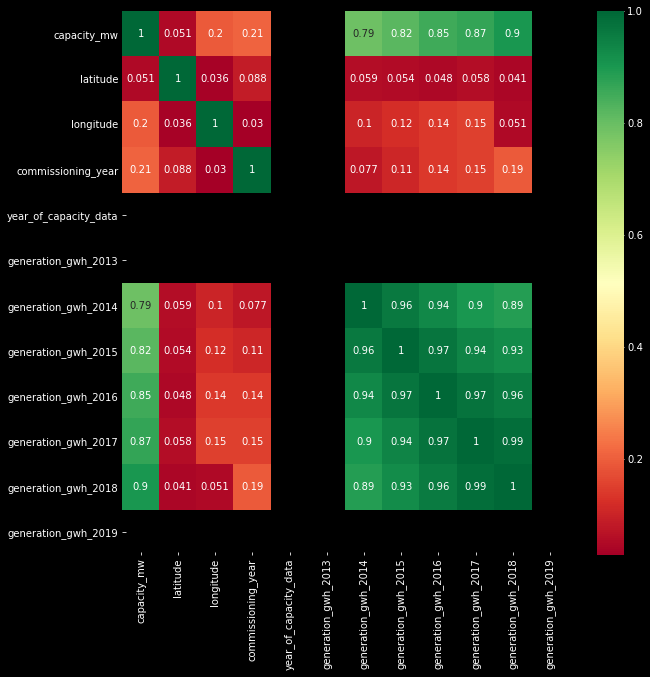

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True,cmap='RdYlGn')
plt.show()

So we can see year_of_capacity_data has only one type of value,so it is showing not any value.
All the generation_gwh_2013 to generation_gwh_2017 columns are strongly  positive correlated to target value capacity_mw.
generation_gwh_2013 to generation_gwh_2017 columns are strongly positive correlated with each other more than 75%.
lattitude and longitude have very weak correlation with target column.

In [156]:
df.drop(columns=['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)
df.shape

(907, 20)

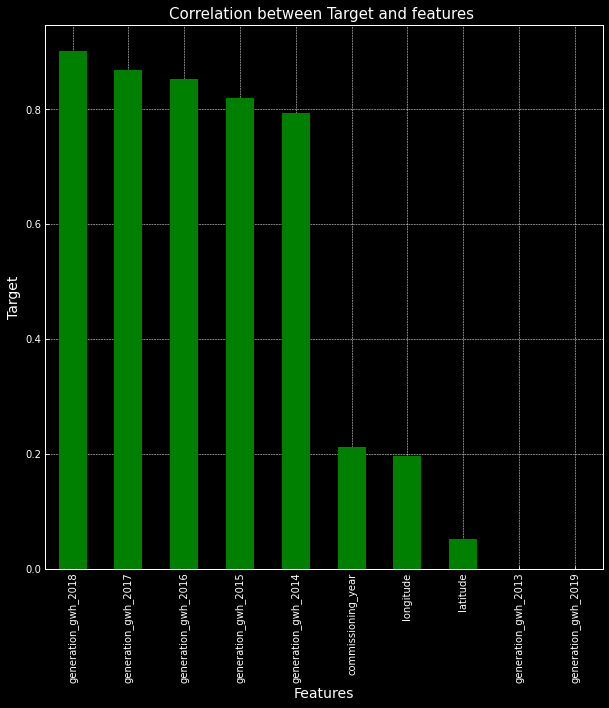

In [157]:
plt.figure(figsize=(10,10))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

outliers

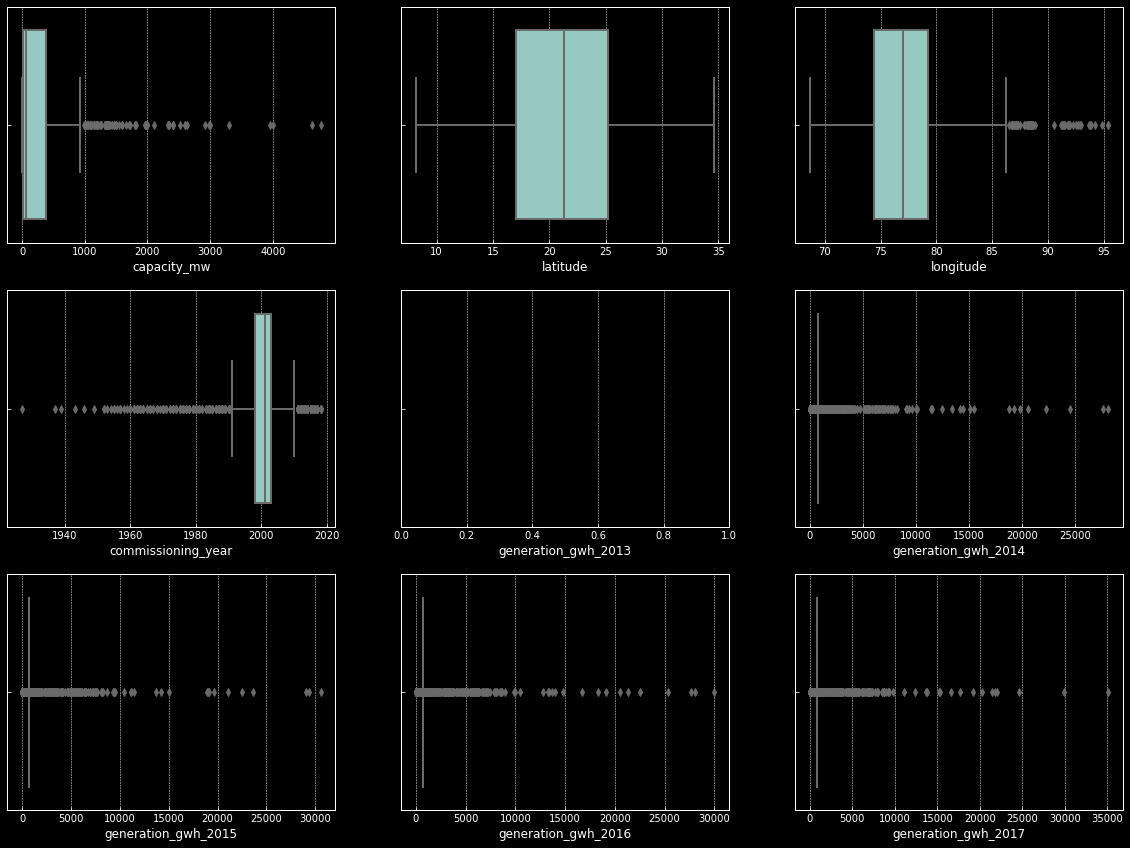

In [158]:
column=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
plt.figure(figsize=(20,20))
graph =1
for i in column:
    if graph <=10:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph +=1
        
plt.show()    

zscore

In [160]:
new_df.skew()

country               NaN
country_long          NaN
name                  NaN
gppd_idnr             NaN
capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
commissioning_year    NaN
owner                 NaN
source                NaN
url                   NaN
geolocation_source    NaN
generation_gwh_2013   NaN
generation_gwh_2014   NaN
generation_gwh_2015   NaN
generation_gwh_2016   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64